In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from UncorrelatedFBSNNs import *
from CallOptionsBasket import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 128  # number of trajectories (batch size)
N = 200  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1] * int(D))[None, :]
T = 1.0

"Available architectures"
mode = "NAIS-Net"  # FC, Resnet and NAIS-Net are available
activation = "Sine"  # Sine and ReLU are available
model = CallOptionsBasket(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 1.666e+04, Y0: 0.926, Time: 0.43, Learning Rate: 1.000e-03
It: 100, Loss: 1.831e+03, Y0: 4.653, Time: 1.45, Learning Rate: 1.000e-03
It: 200, Loss: 1.116e+03, Y0: 5.245, Time: 1.56, Learning Rate: 1.000e-03
It: 300, Loss: 1.081e+03, Y0: 5.077, Time: 1.57, Learning Rate: 1.000e-03
It: 400, Loss: 9.672e+02, Y0: 5.244, Time: 1.50, Learning Rate: 1.000e-03
It: 500, Loss: 7.211e+02, Y0: 5.103, Time: 1.41, Learning Rate: 1.000e-03
It: 600, Loss: 7.540e+02, Y0: 4.794, Time: 1.42, Learning Rate: 1.000e-03
It: 700, Loss: 6.383e+02, Y0: 4.805, Time: 1.48, Learning Rate: 1.000e-03
It: 800, Loss: 6.051e+02, Y0: 4.999, Time: 1.43, Learning Rate: 1.000e-03
It: 900, Loss: 6.573e+02, Y0: 4.692, Time: 1.43, Learning Rate: 1.000e-03
It: 1000, Loss: 6.546e+02, Y0: 5.578, Time: 1.45, Learning Rate: 1.000e-03
It: 1100, Loss: 7.684e+02, Y0: 5.024, Time: 1.42, Learning Rate: 1.000e-03
It: 1200, Loss: 5.437e+02, Y0: 4.845, Time: 1.40, Learning Rate: 1.000e-03
It: 1300, Loss: 7.934e+02, Y0:

In [5]:
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)
    Y_pred = np.concatenate((Y_pred, Y_pred_i), axis=0)


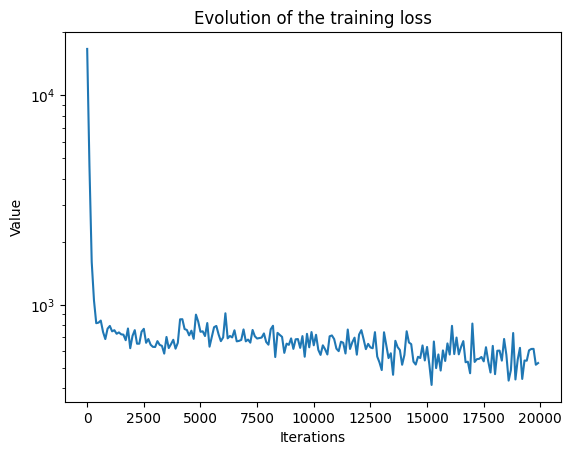

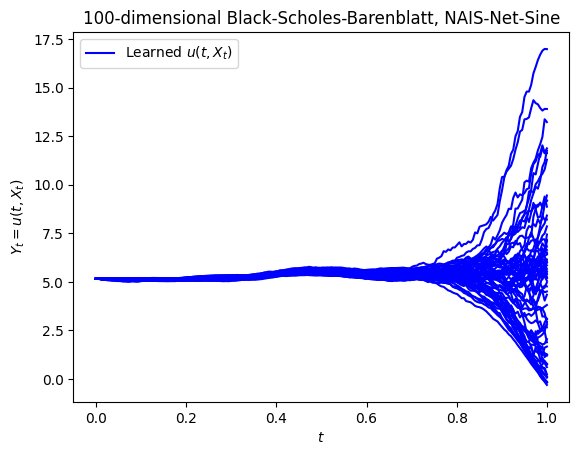

In [6]:
plt.figure()
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
samples = 64

plt.figure()
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')


plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()

plt.show()

In [7]:
Y_pred.shape

(8192, 202, 1)

In [9]:
Y_preds = Y_pred.reshape(8192, 202)

In [10]:
time_stamps = t_test[0].reshape(202,)
time_stamps

array([0.        , 0.00497512, 0.00995025, 0.01492537, 0.0199005 ,
       0.02487562, 0.02985075, 0.03482587, 0.03980099, 0.04477612,
       0.04975124, 0.05472637, 0.05970149, 0.06467662, 0.06965174,
       0.07462686, 0.07960199, 0.08457711, 0.08955224, 0.09452736,
       0.09950249, 0.10447761, 0.10945274, 0.11442786, 0.11940298,
       0.12437811, 0.12935324, 0.13432837, 0.13930348, 0.1442786 ,
       0.14925373, 0.15422885, 0.15920398, 0.1641791 , 0.16915423,
       0.17412935, 0.17910448, 0.1840796 , 0.18905473, 0.19402985,
       0.19900498, 0.2039801 , 0.20895523, 0.21393035, 0.21890548,
       0.2238806 , 0.22885571, 0.23383084, 0.23880596, 0.24378109,
       0.24875621, 0.25373134, 0.25870648, 0.2636816 , 0.26865673,
       0.27363184, 0.27860695, 0.2835821 , 0.2885572 , 0.29353234,
       0.29850745, 0.3034826 , 0.3084577 , 0.31343284, 0.31840795,
       0.3233831 , 0.3283582 , 0.33333334, 0.33830845, 0.3432836 ,
       0.3482587 , 0.35323384, 0.35820895, 0.3631841 , 0.36815

In [11]:
r = 0.05

In [12]:
epe = np.mean(np.exp(-r*time_stamps) * np.maximum(Y_preds,0),axis=0)    
epe

array([5.1769366, 5.166591 , 5.156835 , 5.14788  , 5.1395707, 5.1320715,
       5.125567 , 5.1197886, 5.1147957, 5.11056  , 5.1069913, 5.1040473,
       5.1015   , 5.0995297, 5.097815 , 5.0964675, 5.0951357, 5.0939426,
       5.0926237, 5.0914536, 5.090033 , 5.0885043, 5.086754 , 5.0848966,
       5.0830507, 5.0810175, 5.0792093, 5.0775723, 5.0762186, 5.075043 ,
       5.0745025, 5.074216 , 5.074663 , 5.075485 , 5.0768948, 5.07897  ,
       5.0815277, 5.0845156, 5.0879955, 5.09179  , 5.095774 , 5.0998135,
       5.104243 , 5.1086493, 5.112958 , 5.117325 , 5.1217513, 5.125905 ,
       5.1299734, 5.1339693, 5.137599 , 5.140907 , 5.143801 , 5.146184 ,
       5.1481323, 5.1495013, 5.1503515, 5.1507535, 5.150754 , 5.1504793,
       5.149974 , 5.149458 , 5.1491094, 5.148831 , 5.1491866, 5.150033 ,
       5.1516075, 5.1541653, 5.1573176, 5.161663 , 5.1670876, 5.1733794,
       5.180796 , 5.189018 , 5.1983933, 5.208623 , 5.2197638, 5.2315383,
       5.2441535, 5.2572308, 5.2706094, 5.284259 , 

In [13]:
ene = np.mean(np.exp(-r*time_stamps) * np.minimum(Y_preds,0),axis=0)    
ene

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [14]:
for i in range(63):
    t_test_i, W_test_i = model.fetch_minibatch()
    X_pred_i, Y_pred_i = model.predict(Xi, t_test_i, W_test_i)
    if type(X_pred_i).__module__ != 'numpy':
        X_pred_i = X_pred_i.cpu().detach().numpy()
    if type(Y_pred_i).__module__ != 'numpy':
        Y_pred_i = Y_pred_i.cpu().detach().numpy()
    X_pred = np.concatenate((X_pred, X_pred_i), axis=0)

In [15]:
X_pred

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.0129293 , 1.0094243 , 1.0304915 , ..., 0.98075646,
         1.0051198 , 1.0224438 ],
        [1.0489184 , 0.94773525, 1.0069371 , ..., 0.944291  ,
         0.977032  , 1.0169282 ],
        ...,
        [0.7430819 , 0.70668095, 1.056864  , ..., 0.90736014,
         0.7892059 , 0.7747587 ],
        [0.77006364, 0.6635499 , 1.0443726 , ..., 0.9417135 ,
         0.79121375, 0.7681864 ],
        [0.7516534 , 0.6419892 , 1.040104  , ..., 0.9797052 ,
         0.75744843, 0.70338315]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [0.991128  , 1.0188929 , 1.0298916 , ..., 1.0377415 ,
         0.98379225, 1.0047997 ],
        [0.9520509 , 0.9823598 , 1.0176681 , ..., 0.99778765,
         0.9647237 , 0.9811672 ],
        ...,
        [1.0279484 , 1.0529588 , 2.2275155 , ..., 1.18257   ,
         0.98733646, 0.90172565],
        [1.0

In [16]:
portfolio = np.sum(X_pred, axis=2, keepdims=True)
portfolio

array([[[100.      ],
        [100.26403 ],
        [ 99.84283 ],
        ...,
        [101.42477 ],
        [101.523125],
        [101.81054 ]],

       [[100.      ],
        [ 99.98178 ],
        [ 99.96393 ],
        ...,
        [100.60624 ],
        [100.51351 ],
        [100.51672 ]],

       [[100.      ],
        [ 99.94252 ],
        [ 99.915726],
        ...,
        [112.54506 ],
        [111.98467 ],
        [112.05545 ]],

       ...,

       [[100.      ],
        [100.33258 ],
        [100.46772 ],
        ...,
        [106.06776 ],
        [106.375824],
        [106.36349 ]],

       [[100.      ],
        [100.326035],
        [100.88555 ],
        ...,
        [106.576004],
        [106.59344 ],
        [106.81042 ]],

       [[100.      ],
        [100.27835 ],
        [100.440216],
        ...,
        [104.12924 ],
        [104.931114],
        [104.77128 ]]], dtype=float32)

In [17]:
payoff = np.maximum(portfolio - 1 * 100, 0)
payoff

array([[[ 0.        ],
        [ 0.26403046],
        [ 0.        ],
        ...,
        [ 1.4247665 ],
        [ 1.5231247 ],
        [ 1.8105392 ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [ 0.6062393 ],
        [ 0.51351166],
        [ 0.51672363]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        ...,
        [12.545059  ],
        [11.984673  ],
        [12.05545   ]],

       ...,

       [[ 0.        ],
        [ 0.33258057],
        [ 0.46772003],
        ...,
        [ 6.0677567 ],
        [ 6.375824  ],
        [ 6.3634872 ]],

       [[ 0.        ],
        [ 0.32603455],
        [ 0.88555145],
        ...,
        [ 6.576004  ],
        [ 6.593437  ],
        [ 6.810417  ]],

       [[ 0.        ],
        [ 0.27835083],
        [ 0.44021606],
        ...,
        [ 4.129242  ],
        [ 4.931114  ],
        [ 4.7712784 ]]], dtype=float32)

In [18]:
average = np.mean(payoff, axis=0, keepdims=True)
average

array([[[0.        ],
        [0.12573455],
        [0.18623474],
        [0.2386043 ],
        [0.2815193 ],
        [0.3208929 ],
        [0.35900885],
        [0.3908775 ],
        [0.4271393 ],
        [0.46096757],
        [0.49302533],
        [0.5245361 ],
        [0.5547054 ],
        [0.5863791 ],
        [0.6162396 ],
        [0.6452993 ],
        [0.67550087],
        [0.70573866],
        [0.7358001 ],
        [0.76443905],
        [0.7920894 ],
        [0.81896216],
        [0.84809554],
        [0.87234634],
        [0.90115976],
        [0.92922133],
        [0.955641  ],
        [0.9813259 ],
        [1.0081452 ],
        [1.034981  ],
        [1.0632902 ],
        [1.0898045 ],
        [1.1171072 ],
        [1.1448451 ],
        [1.1728445 ],
        [1.2027701 ],
        [1.2292751 ],
        [1.2533962 ],
        [1.281301  ],
        [1.3077916 ],
        [1.3332535 ],
        [1.3583754 ],
        [1.3844582 ],
        [1.4081843 ],
        [1.4298412 ],
        [1

In [19]:
average.shape

(1, 202, 1)

In [20]:
mc_price = np.exp(-r * 1) * average[:, -1,: ]
mc_price[0][0]

5.085695

In [21]:
epe_exact = np.array([mc_price[0][0] for s in time_stamps[1:]])
ene_exact = np.array([0.0 for s in time_stamps[1:]])

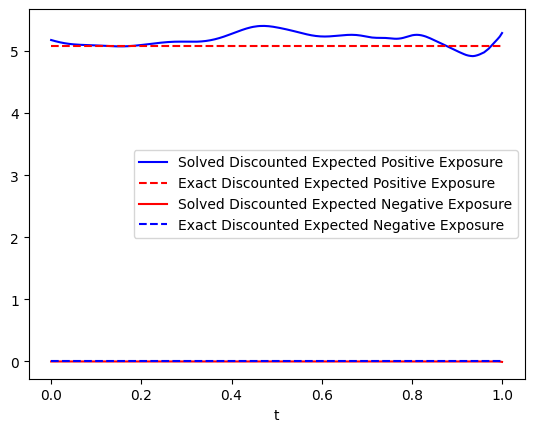

In [22]:
fig = plt.figure()
plt.plot(time_stamps,np.transpose(epe),'b',label='Solved Discounted Expected Positive Exposure' )
plt.plot(time_stamps,[mc_price[0][0]] + list(epe_exact),'r--',label='Exact Discounted Expected Positive Exposure')
plt.plot(time_stamps,np.transpose(ene),'r',label='Solved Discounted Expected Negative Exposure')
plt.plot(time_stamps,[0.0]+list(ene_exact),'b--',label='Exact Discounted Expected Negative Exposure')

plt.xlabel('t')
plt.legend()

plt.show()

In [23]:
model.save_model("models/100DCallOption.pth")